<a href="https://colab.research.google.com/github/juberijuber/Image-Classification/blob/main/Image%20Classification%20using_our_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

ImportError: cannot import name 'ImageDataGenerator' from 'keras.preprocessing.image' (/usr/local/lib/python3.10/dist-packages/keras/api/preprocessing/image/__init__.py)


Image augementation techniques:


1.image rotation
2.image shifting
3.image scaling
4.image flipping
5.image noising
6.image blurring




In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
x_train=train_datagen.flow_from_directory(r"/content/drive/MyDrive/trainset",
target_size=(64,64),batch_size=32,class_mode="categorical")
x_test=test_datagen.flow_from_directory(r"/content/drive/MyDrive/testset",
target_size=(64,64),batch_size=3249,class_mode="categorical")

In [ ]:
print(x_train.class_indices)


In [ ]:
model=Sequential()

In [ ]:
#adding convolution layer(no.of filters,filter size,input shape,activation function)
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation="relu"))



In [ ]:
#adding max pooling layer(pool_size)
model.add(MaxPooling2D(pool_size=(2,2)))


In [ ]:
#input layer of ann
model.add(Flatten())
#add hidden layer(no.of neurons,activation=relu,weights)
model.add(Dense(units=128,activation="relu"))
#add output layer(no.of output classes=5,activation function=softmax)
model.add(Dense(units=5,activation="softmax"))


In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
 dense (Dense)               (None, 128)               3936384   
                                                                 
 dense_1 (Dense)             (None, 5)                 645       
                                                                 
Total params: 3937925 (15.02 MB)
Trainable params: 3937925 (15.02 MB)
Non-trainable params: 0 (0.00 Byte)
________________

In [ ]:
#configure the learning process(loss fucntion,accuracy,optimizer)
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [ ]:
history=model.fit(x_train,steps_per_epoch=10,epochs=10,validation_data=x_test,validation_steps=20)


NameError: name 'model' is not defined

In [ ]:
model.save("animal.h5")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model
from keras.preprocessing import image
import numpy as np

In [ ]:
model=load_model("animal.h5")

In [ ]:
img = image.load_img(r"/content/drive/MyDrive/testset/elephants/2Q__ (2).jpeg", target_size=(64, 64))

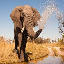

In [ ]:
img


In [ ]:
x=image.img_to_array(img)


In [ ]:
 x.shape

(64, 64, 3)

1. Even if you are predicting a single image, the model still expects the input to be in a batch format
2. The shape of the input data for a Keras model should be (batch_size, height, width, channels).


In [ ]:
x=np.expand_dims(x,axis=0)

In [ ]:
x.shape

(1, 64, 64, 3)

In [ ]:
y=model.predict(x)
pred=y.argmax( axis=1)


1/1 [==============================] - 0s 97ms/step


In [ ]:
y


array([[0., 0., 1., 0., 0.]], dtype=float32)

In [ ]:
pred


array([2])

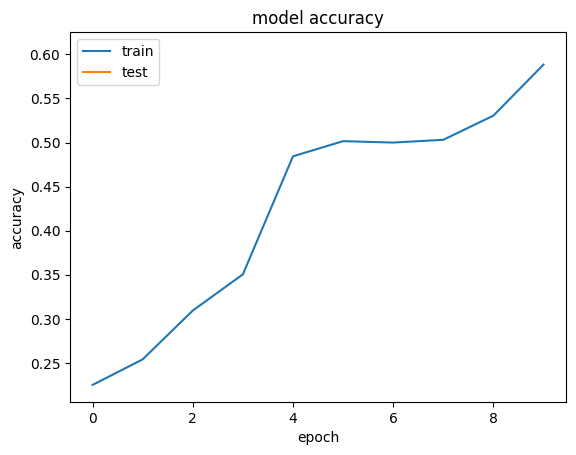

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

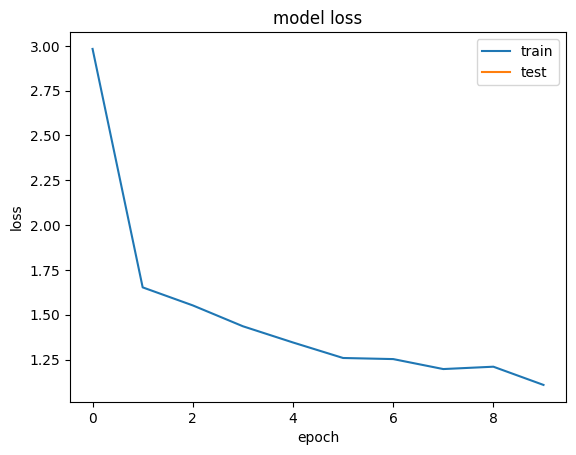

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
pred_multilabel = mlb.fit_transform(pred.reshape(-1, 1))  # Reshape if 'pred' is 1D

# Now you can try calculating the accuracy score again:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y, pred_multilabel)

print(accuracy)

ValueError: Classification metrics can't handle a mix of multilabel-indicator and binary targets

In [ ]:
x_train.class_indices

In [ ]:
index=['bears', 'crows', 'elephants', 'racoons', 'rats']
result=str(index[pred[0]])

In [ ]:
result
